# Набор данных о сухих бобах (Dry Bean Dataset)
(https://archive.ics.uci.edu/dataset/602/dry+bean+dataset)

Изображения 13 611 зерен 7 различных зарегистрированных сухих бобов были сделаны камерой высокого разрешения.

Информация о переменных:
1. Площадь (Area) (A): Площадь зоны боба и количество пикселей внутри её границ.
2. Периметр (Perimeter) (P): Периметр боба определяется как длина его границы.
3. Длина большой оси (MajorAxisLength) (L): Расстояние между концами самой длинной линии, которую можно провести от боба.
4. Длина малой оси (MinorAxisLength) (l): Самая длинная линия, которую можно провести от боба, стоя перпендикулярно главной оси.
5. Отношение сторон (AspectRatio) (K): Определяет отношение между L и l.
6. Эксцентриситет (Eccentricity) (Ec): Эксцентриситет эллипса, имеющего те же моменты, что и область.
7. Конвексная площадь (ConvexArea) (C): Количество пикселей в наименьшем выпуклом многоугольнике, который может содержать площадь семени боба.
8. Эквивалентный диаметр (EquivDiameter) (Ed): Диаметр круга, имеющего ту же площадь, что и площадь семени боба.
9. Протяженность (Extent) (Ex): Отношение пикселей в ограничивающем прямоугольнике к пощади боба.
10. Прочность (Solidity) (S): Также известная как выпуклость. Отношение пикселей в выпклой оболочке к тем, что находятся в бобах.
11. Круглость (Roundness) (R): Рассчитывается по следующей формуле: (4πA)/(P^2)
12. Компактность (Compactness) (CO): Измеряет округлость объекта: Ed/L
13. Фактор формы 1 (SF1)
14. Фактор формы 2 (SF2)
15. Фактор формы 3 (SF3)
16. Фактор формы 4 (SF4)
17. Класс (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz и Sira)

In [1]:
!pip install ucimlrepo
!pip install munkres
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 921.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=e8804ef51f89b7a220a0092def54ad23482e7156591d2fe223f53eb01139c761
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import umap


from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from munkres import Munkres, print_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.cluster import estimate_bandwidth

In [63]:
from ucimlrepo import fetch_ucirepo

dry_bean_dataset = fetch_ucirepo(id=602)


feature_data = dry_bean_dataset.data.features # данные о свойствах
class_data = dry_bean_dataset.data.targets # данные о классах

In [64]:
print(dry_bean_dataset.variables['name'])

feature_data

0                Area
1           Perimeter
2     MajorAxisLength
3     MinorAxisLength
4         AspectRatio
5        Eccentricity
6          ConvexArea
7       EquivDiameter
8              Extent
9            Solidity
10          Roundness
11        Compactness
12       ShapeFactor1
13       ShapeFactor2
14       ShapeFactor3
15       ShapeFactor4
16              Class
Name: name, dtype: object


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0      28395    610.291       208.178117       173.888747     1.197191   
1      28734    638.018       200.524796       182.734419     1.097356   
2      29380    624.110       212.826130       175.931143     1.209713   
3      30008    645.884       210.557999       182.516516     1.153638   
4      30140    620.134       201.847882       190.279279     1.060798   
...      ...        ...              ...              ...          ...   
13606  42097    759.696       288.721612       185.944705     1.552728   
13607  42101    757.499       281.576392       190.713136     1.476439   
13608  42139    759.321       281.539928       191.187979     1.472582   
13609  42147    763.779       283.382636       190.275731     1.489326   
13610  42159    772.237       295.142741       182.204716     1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         0.913358      0.007332      0.003147      0.834222      0.998724  
1         0.953861      0.006979      0.003564      0.909851      0.998430  
2         0.908774      0.007244      0.003048      0.825871      0.999066  
3         0.928329      0.007017      0.003215      0.861794      0.994199  
4         0.970516      0.006697      0.003665      0.941900      0.999166  
...            ...           ...           ...           ...           ...  
13606     0.801865      0.006858      0.001749      0.642988      0.998385  
13607     0.822252      0.006688      0.001886      0.676099      0.998219  
13608     0.822730      0.006681      0.001888      0.676884      0.996767  
13609     0.817457      0.006724      0.001852      0.668237      0.995222  
13610     0.784997      0.007001      0.001640      0.616221      0.998180  

[13611 rows x 16 columns]

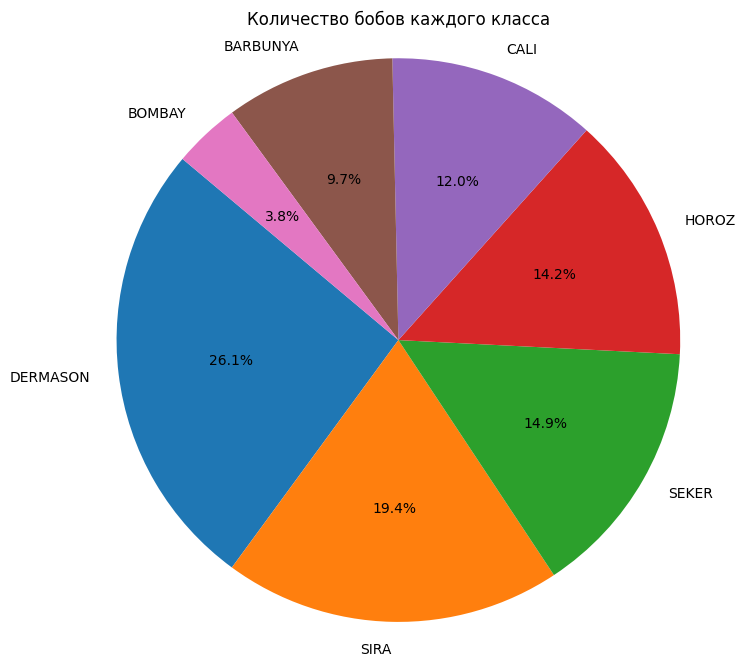

In [65]:
df_dry_bean = pd.concat([feature_data, class_data], axis=1)
df_dry_bean.columns = dry_bean_dataset.variables['name'].tolist()

class_counts = df_dry_bean['Class'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Количество бобов каждого класса')
plt.axis('equal')
plt.show()

# Предварительная обработка данных

Корреляция Area and Area: 1.00
Корреляция Area and Perimeter: 0.97
Корреляция Area and MajorAxisLength: 0.93
Корреляция Area and MinorAxisLength: 0.95
Корреляция Area and AspectRatio: 0.24
Корреляция Area and Eccentricity: 0.27
Корреляция Area and ConvexArea: 1.00
Корреляция Area and EquivDiameter: 0.98
Корреляция Area and Extent: 0.05
Корреляция Area and Solidity: -0.20
Корреляция Area and Roundness: -0.36
Корреляция Area and Compactness: -0.27
Корреляция Area and ShapeFactor1: -0.85
Корреляция Area and ShapeFactor2: -0.64
Корреляция Area and ShapeFactor3: -0.27
Корреляция Area and ShapeFactor4: -0.36


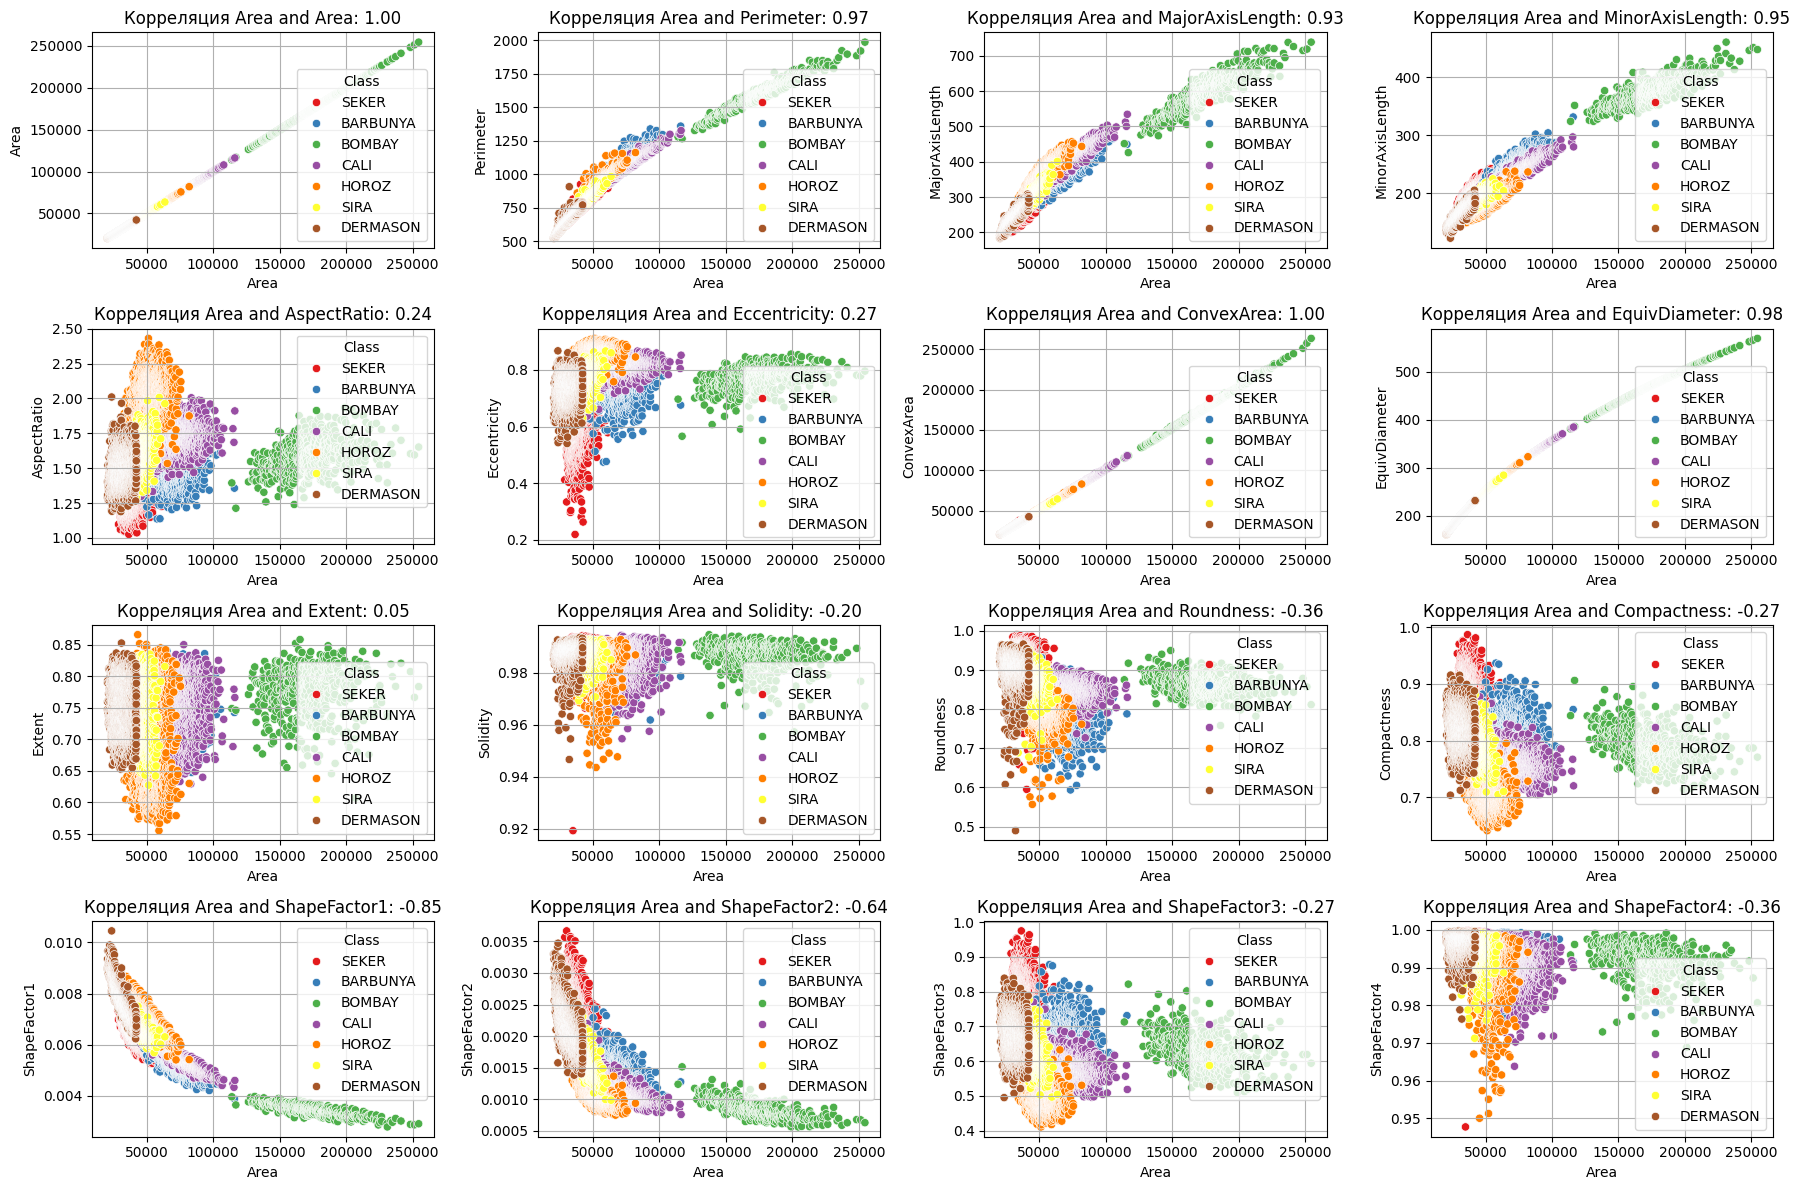

In [66]:
plt.figure(figsize=(18, 12))

for i, feature in enumerate(feature_data.columns, 1):
    correlation = df_dry_bean['Area'].corr(df_dry_bean[feature])
    plt.subplot(4, 4, i)
    sns.scatterplot(x='Area', y=feature, hue='Class', data=df_dry_bean, palette='Set1')
    plt.title(f'Корреляция Area and {feature}: {correlation:.2f}')
    plt.xlabel('Area')
    plt.ylabel(feature)
    plt.grid(True)
    print(f'Корреляция Area and {feature}: {correlation:.2f}')


plt.tight_layout()

plt.show()

### Для правильной оценки используем такие признаки, у которых корреляция приблизительно равна нулю, что нам о говорит о слабой связи между ними.
### К таким признакам относятся:

* Корреляция Area and AspectRatio: 0.24
* Корреляция Area and Eccentricity: 0.27
* Корреляция Area and Extent: 0.05
* Корреляция Area and Solidity: -0.20
* Корреляция Area and Roundness: -0.36
* Корреляция Area and Compactness: -0.27

Также можно заметить, что есть признаки, между которыми также наблюдается слабая связь, а именно ShapeFactor1 - ShapeFactor4. Однако в описании задачи нераскрыта свойство данных признаков, поэтому для исключения непредвиденных ложных результатов данные признаки не будут использоваться для дальнейшей работы

In [67]:
# Список столбцов, которые нужно оставить
columns_to_keep = [
    'Area',
    'AspectRatio',
    'Eccentricity',
    'Extent',
    'Solidity',
    'Roundness',
    'Compactness'
]

# Удаление столбцов, кроме указанных
df_cleaned = df_dry_bean.drop(columns=df_dry_bean.columns.difference(columns_to_keep))

In [68]:
def print_correlation(df, target_feature):
    for feature in df.columns:
        correlation = df[target_feature].corr(df[feature])
        print(f'Корреляция между {target_feature} и {feature}: {correlation:.2f}')

# Применяем функцию для каждого из признаков
target_features = ['AspectRatio', 'Eccentricity', 'Extent', 'Solidity', 'Roundness', 'Compactness']
for target_feature in target_features:
    print_correlation(df_cleaned, target_feature)

Корреляция между AspectRatio и Area: 0.24
Корреляция между AspectRatio и AspectRatio: 1.00
Корреляция между AspectRatio и Eccentricity: 0.92
Корреляция между AspectRatio и Extent: -0.37
Корреляция между AspectRatio и Solidity: -0.27
Корреляция между AspectRatio и Roundness: -0.77
Корреляция между AspectRatio и Compactness: -0.99
Корреляция между Eccentricity и Area: 0.27
Корреляция между Eccentricity и AspectRatio: 0.92
Корреляция между Eccentricity и Eccentricity: 1.00
Корреляция между Eccentricity и Extent: -0.32
Корреляция между Eccentricity и Solidity: -0.30
Корреляция между Eccentricity и Roundness: -0.72
Корреляция между Eccentricity и Compactness: -0.97
Корреляция между Extent и Area: 0.05
Корреляция между Extent и AspectRatio: -0.37
Корреляция между Extent и Eccentricity: -0.32
Корреляция между Extent и Extent: 1.00
Корреляция между Extent и Solidity: 0.19
Корреляция между Extent и Roundness: 0.34
Корреляция между Extent и Compactness: 0.35
Корреляция между Solidity и Area: -0.

### Используем следующие пары признаков:

* Корреляция между Extent и Area: 0.05
* Корреляция между Extent и Solidity: 0.19
* Корреляция между Solidity и Area: -0.20





In [69]:
# Список столбцов, которые нужно оставить
columns_to_keep = [
    'Area',
    'Extent',
    'Solidity',
    'Class'
]

# Удаление столбцов, кроме указанных
df_new = df_dry_bean.drop(columns=df_dry_bean.columns.difference(columns_to_keep))

In [70]:
df_new

Area    Extent  Solidity     Class
0      28395  0.763923  0.988856     SEKER
1      28734  0.783968  0.984986     SEKER
2      29380  0.778113  0.989559     SEKER
3      30008  0.782681  0.976696     SEKER
4      30140  0.773098  0.990893     SEKER
...      ...       ...       ...       ...
13606  42097  0.714574  0.990331  DERMASON
13607  42101  0.799943  0.990752  DERMASON
13608  42139  0.729932  0.989899  DERMASON
13609  42147  0.705389  0.987813  DERMASON
13610  42159  0.788962  0.989648  DERMASON

[13611 rows x 4 columns]

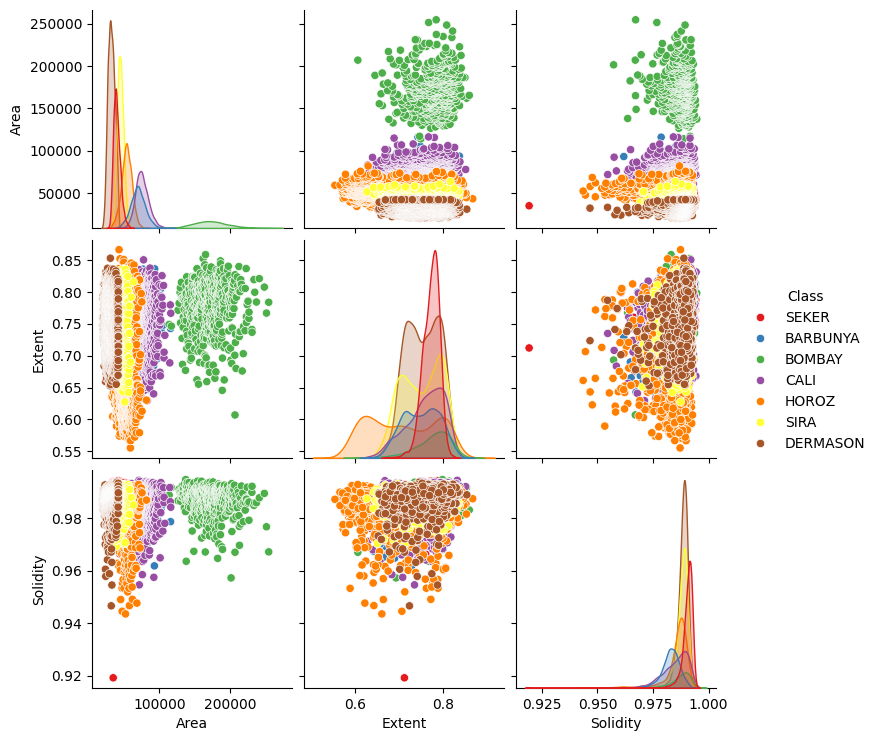

In [71]:
sns.pairplot(df_new[df_new.columns], hue='Class', palette='Set1', diag_kind='kde')
plt.show()

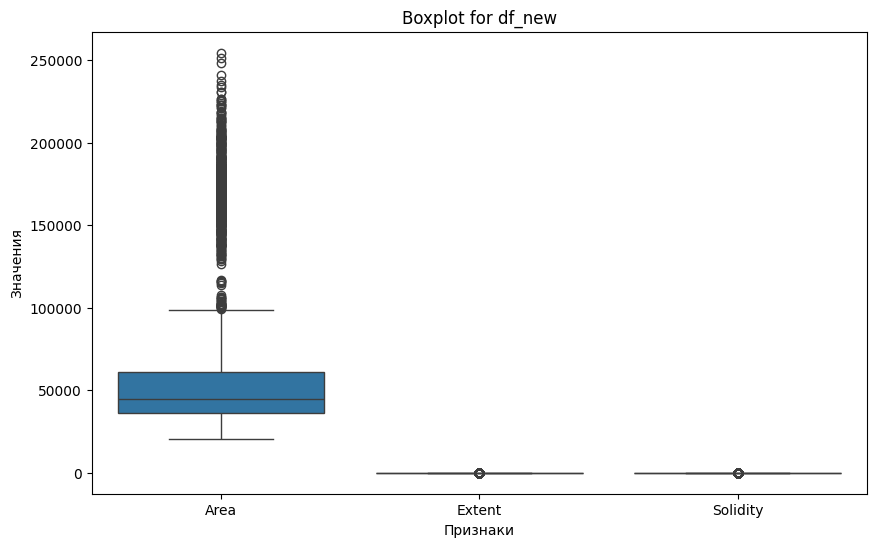

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new)
plt.title('Boxplot for df_new')
plt.xlabel('Признаки')
plt.ylabel('Значения')
plt.show()

In [73]:
df_cleaned = df_new.drop_duplicates(keep="first")

df_cleaned = df_cleaned.dropna()

In [74]:
numeric_features = ['Area', 'Extent', 'Solidity']

medians = df_cleaned[numeric_features].median()

print("Медианы для каждого признака:")
print(medians)

Медианы для каждого признака:
Area        44580.000000
Extent          0.759903
Solidity        0.988288
dtype: float64


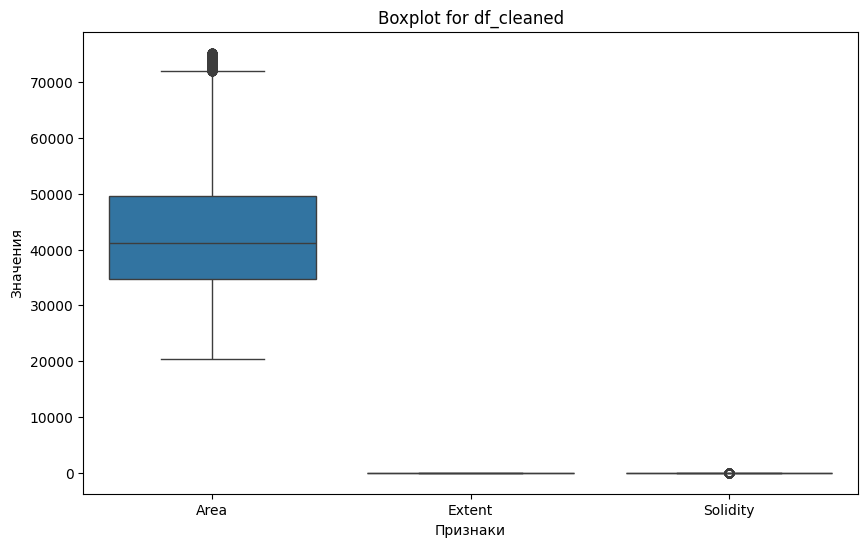

In [75]:
for feature in numeric_features:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.65)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned)
plt.title('Boxplot for df_cleaned')
plt.xlabel('Признаки')
plt.ylabel('Значения')
plt.show()

In [76]:
df_cleaned

Area    Extent  Solidity     Class
0      28395  0.763923  0.988856     SEKER
1      28734  0.783968  0.984986     SEKER
2      29380  0.778113  0.989559     SEKER
4      30140  0.773098  0.990893     SEKER
5      30279  0.775688  0.989510     SEKER
...      ...       ...       ...       ...
13606  42097  0.714574  0.990331  DERMASON
13607  42101  0.799943  0.990752  DERMASON
13608  42139  0.729932  0.989899  DERMASON
13609  42147  0.705389  0.987813  DERMASON
13610  42159  0.788962  0.989648  DERMASON

[10634 rows x 4 columns]

In [77]:
df_wt_class = df_cleaned.drop(columns='Class')

feature_columns = df_wt_class.columns

scaler = MinMaxScaler()

df_wt_class[feature_columns] = scaler.fit_transform(df_wt_class[feature_columns])

In [78]:
df_wt_class

Area    Extent  Solidity
0      0.145325  0.603008  0.580970
1      0.151502  0.692505  0.280836
2      0.163274  0.666365  0.635467
4      0.177123  0.643974  0.738950
5      0.179656  0.655539  0.631670
...         ...       ...       ...
13606  0.395011  0.382685  0.695368
13607  0.395084  0.763827  0.727969
13608  0.395776  0.451254  0.661831
13609  0.395922  0.341677  0.500058
13610  0.396140  0.714803  0.642377

[10634 rows x 3 columns]

In [92]:
numeric_features = ['Area', 'Extent', 'Solidity']

medians = df_wt_class[numeric_features].median()

print("Медианы для каждого признака:")
print(medians)

Медианы для каждого признака:
Area        0.378656
Extent      0.592779
Solidity    0.572291
dtype: float64


# Кластеризация

## Метод локтя

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

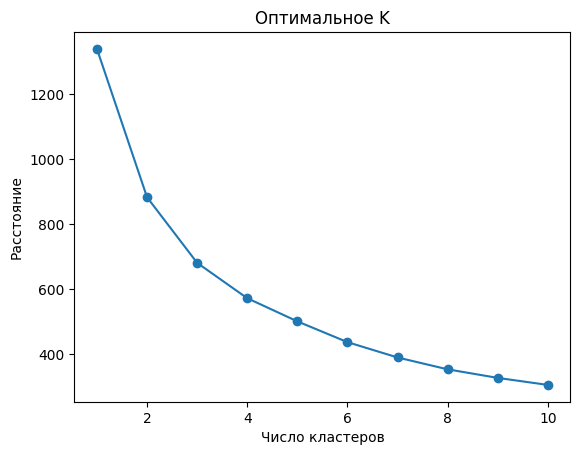

In [79]:
lim_inf = 1
lim_sup = 10

soma_distancias_quadradas = []

for k in range(lim_inf, lim_sup + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_wt_class)
    soma_distancias_quadradas.append(kmeans.inertia_)

plt.plot(range(lim_inf, lim_sup + 1), soma_distancias_quadradas, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Оптимальное K')
plt.show()

## K-Means

In [80]:
k = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3103113985963531


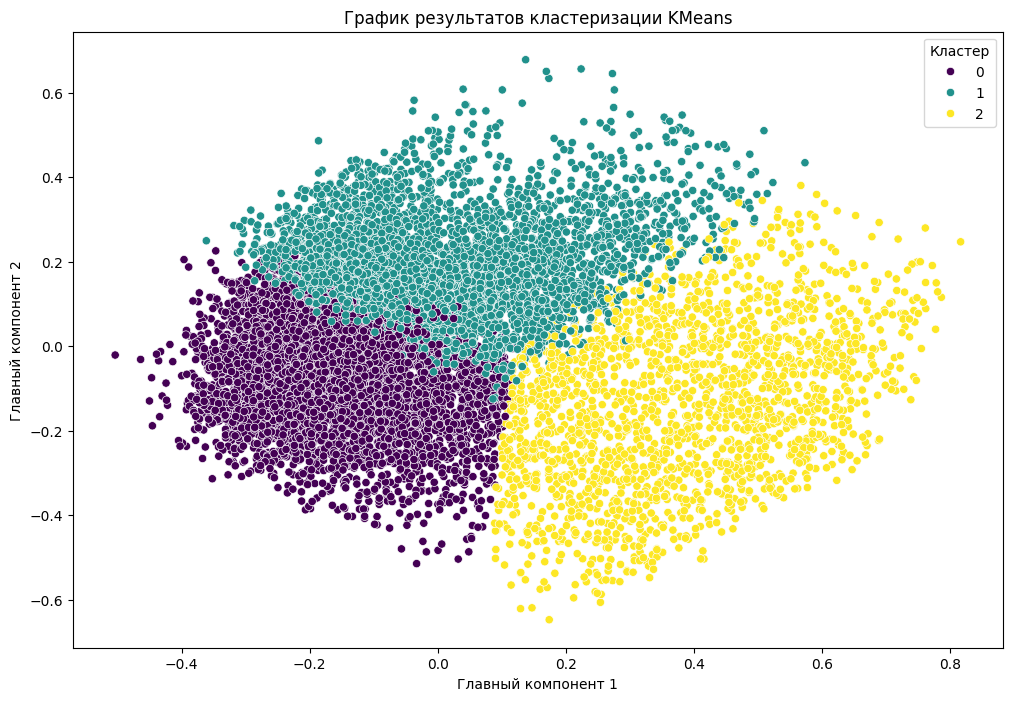

In [123]:
# Инициализация и обучение KMeans
km = KMeans(n_clusters=k, init='k-means++')
km.fit(df_wt_class)

#PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_wt_class)

df_clustered = pd.DataFrame(data=principal_components, columns=['Component 1', 'Component 2'])
df_clustered['Cluster'] = km.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', data=df_clustered, palette='viridis')
plt.title('График результатов кластеризации KMeans')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.legend(title='Кластер')
plt.show()

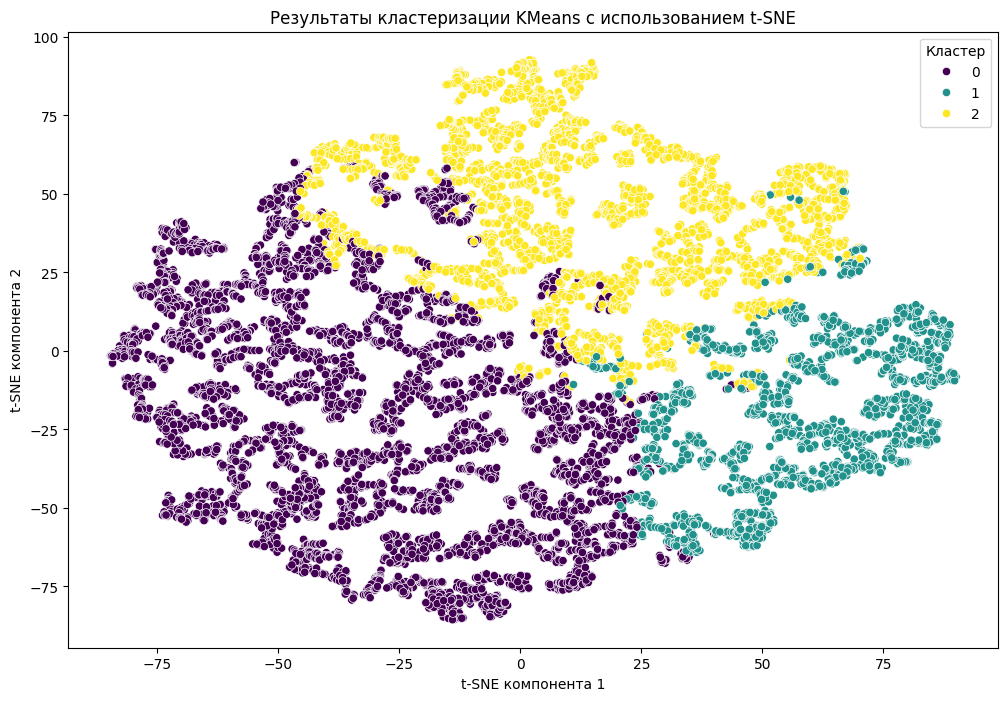

In [82]:
# Применяем t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_wt_class)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue='Cluster', data=df_clustered, palette='viridis')
plt.title('Результаты кластеризации KMeans с использованием t-SNE')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.legend(title='Кластер')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


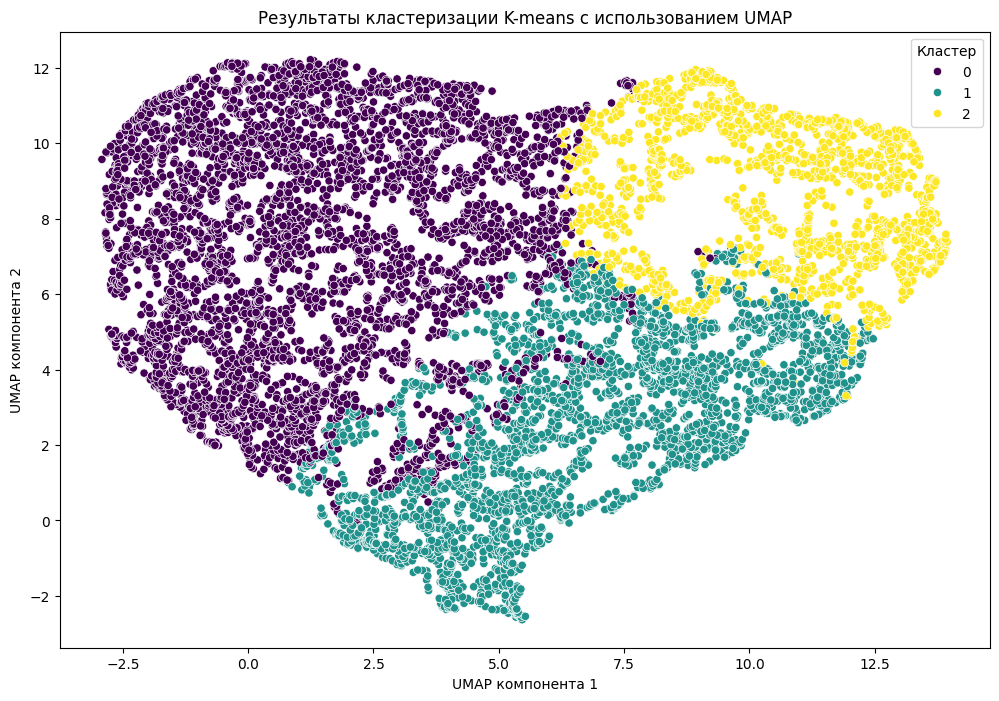

In [83]:
umap_embeddings = umap.UMAP(n_components=2).fit_transform(df_wt_class)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_wt_class)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=clusters, palette='viridis')
plt.title('Результаты кластеризации K-means с использованием UMAP')
plt.xlabel('UMAP компонента 1')
plt.ylabel('UMAP компонента 2')
plt.legend(title='Кластер')
plt.show()

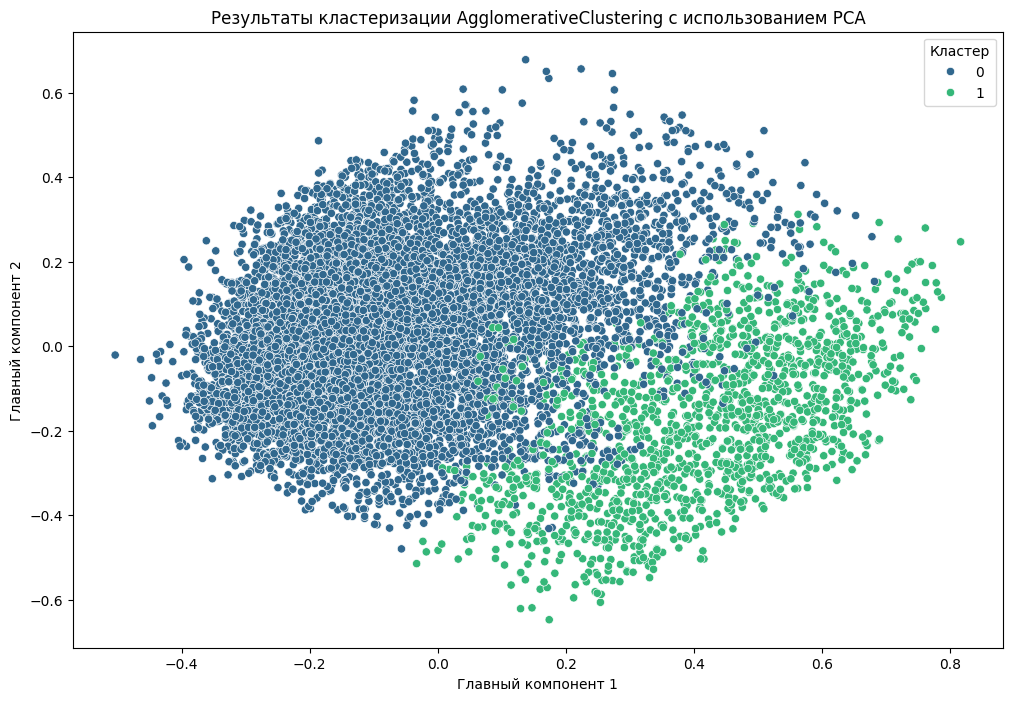

In [137]:
agglomerative = AgglomerativeClustering()
clusters = agglomerative.fit_predict(df_wt_class)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_wt_class)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis')
plt.title('Результаты кластеризации AgglomerativeClustering с использованием PCA')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.legend(title='Кластер')
plt.show()

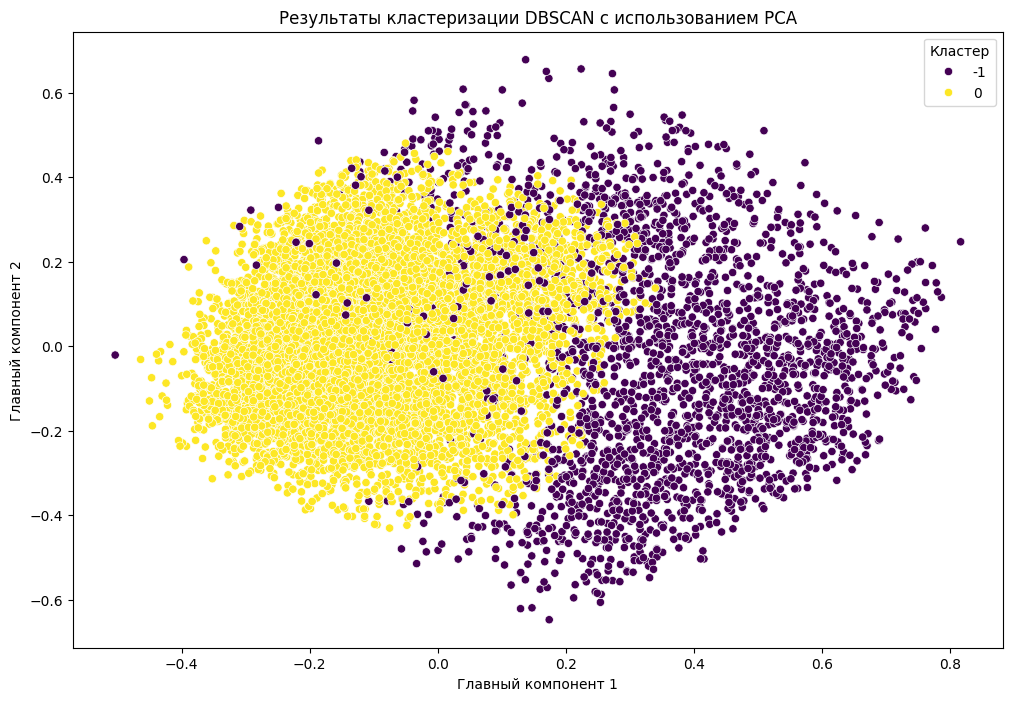

In [134]:
dbscan = DBSCAN(eps=0.1, min_samples=80)
clusters_dbscan = dbscan.fit_predict(df_wt_class)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_wt_class)

# Визуализация результатов
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis')
plt.title('Результаты кластеризации DBSCAN с использованием PCA')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.legend(title='Кластер')
plt.show()

In [121]:
bandwidth = estimate_bandwidth(df_wt_class, quantile=0.1)

0.2322942623370437


MeanShift Silhouette Score: 0.32589898407781037


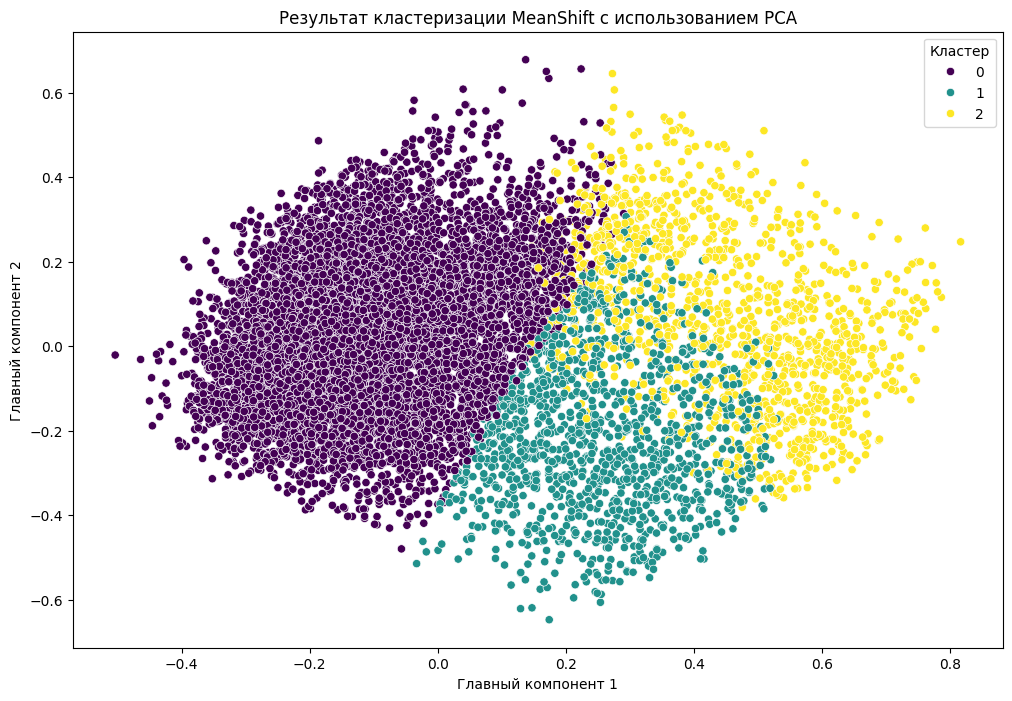

In [122]:
# MeanShift
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(df_wt_class)

cluster_labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_wt_class)

df_clustered = pd.DataFrame(data=pca_result, columns=['Component 1', 'Component 2'])
df_clustered['Cluster'] = cluster_labels


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', data=df_clustered, palette='viridis')
plt.title('Результат кластеризации MeanShift с использованием PCA')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.legend(title='Кластер')
plt.show()

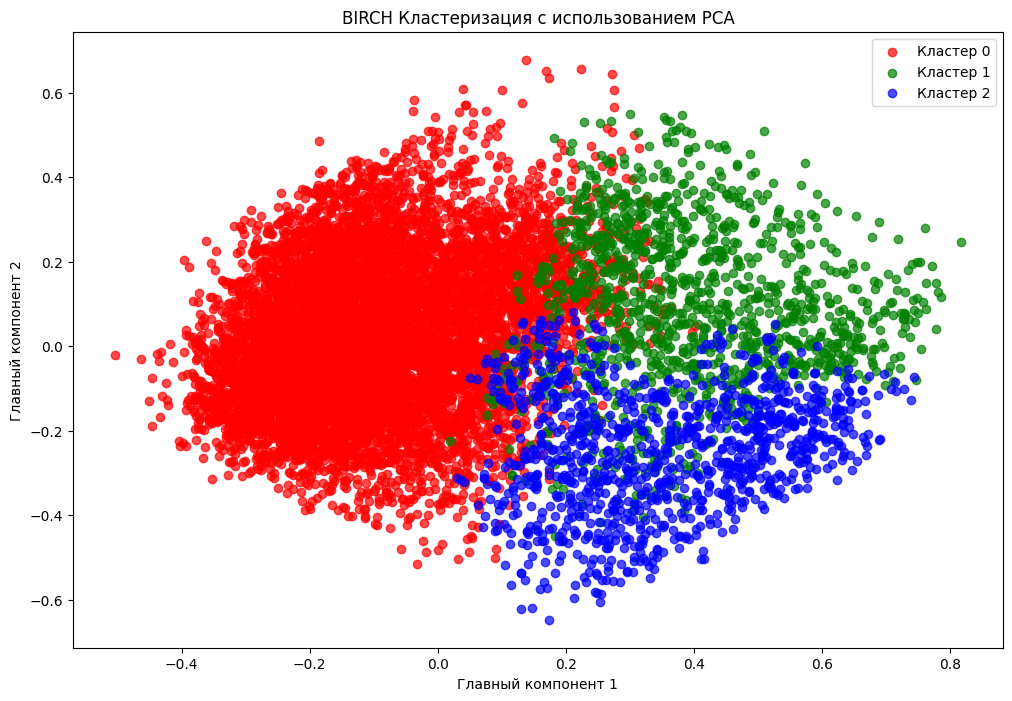

In [132]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

birch = Birch(n_clusters=k, threshold=0.1)
birch.fit(df_wt_class)
labels = birch.labels_

# Визуализация с использованием PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_wt_class)

# Визуализация кластеров
colors = ['red', 'green', 'blue']
plt.figure(figsize=(12, 8))

for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Кластер {i}', c=colors[i], alpha=0.7)

labels = birch.labels_

plt.title('BIRCH Кластеризация с использованием PCA')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.legend()
plt.show()

# Оценка качества кластеризации

K-means Silhouette Score: 0.3103113985963531
Agglomerative Clustering Silhouette Score: 0.3794632168946284
DBSCAN Silhouette Score: 0.3775715351490642
MeanShift Silhouette Score: 0.32589898407781037
Birch Silhouette Score: 0.3380371599157196


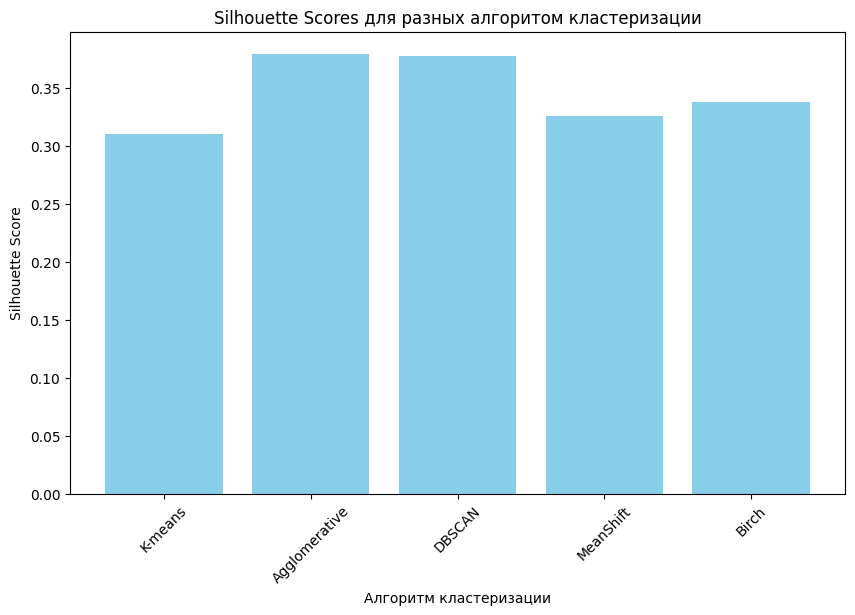

In [138]:
# K-means
silhouette_kmeans = silhouette_score(df_wt_class, km.labels_)
print("K-means Silhouette Score:", silhouette_kmeans)


# Agglomerative
silhouette_avg_agglomerative = silhouette_score(df_wt_class, clusters)
print("Agglomerative Clustering Silhouette Score:", silhouette_avg_agglomerative)


# DBSCAN
silhouette_avg_dbscan = silhouette_score(df_wt_class, clusters_dbscan)
print("DBSCAN Silhouette Score:", silhouette_avg_dbscan)

# MeanShift
silhouette_avg_meanshift = silhouette_score(df_wt_class, meanshift.labels_)
print("MeanShift Silhouette Score:", silhouette_avg_meanshift)

# Birch
silhouette_birch = silhouette_score(df_wt_class, labels)
print("Birch Silhouette Score:", silhouette_birch)

silhouette_scores = [silhouette_kmeans, silhouette_avg_agglomerative, silhouette_avg_dbscan, silhouette_avg_meanshift, silhouette_birch]
algorithms = ['K-means', 'Agglomerative', 'DBSCAN', 'MeanShift', 'Birch']

plt.figure(figsize=(10, 6))
plt.bar(algorithms, silhouette_scores, color='skyblue')
plt.title('Silhouette Scores для разных алгоритом кластеризации')
plt.xlabel('Алгоритм кластеризации')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.show()